# Analysis of computer game sales data for an online store

<br><br>
<center>--- Let's move to December 2016 ---</center>
<br>

<div style="text-align: right">
Just a month ago, entrepreneur Donald Trump won the US presidential race,<br> and in a couple of months at the 89th Academy Awards, the musical La La Land, nominated in 14 categories,<br>will collect six awards, including prizes for best director and best actress (Emma Stone).</div>

---
But let's get back to earth.

We have a dataset containing historical data up to the present (December 2016) on game sales, user and expert ratings, genres and platforms (e.g. Xbox or PlayStation). The data was collected from open sources. \
In the study, we will study the main parameters, calculate the total sales for each game, and try to identify patterns that determine the success of the game. This will allow us to bet on a potentially popular product and plan advertising campaigns.

We will also test a number of hypotheses that can help the business grow:

* Are the average user ratings of the Xbox One and PC platforms the same?

* Are the average user ratings of the Action and Sports genres different?

---
**Study progress**

We obtained the data from the `games.csv` file. Nothing is known about the quality of the data yet.
Therefore, before conducting research analysis and testing hypotheses, we will need a data review.

Thus, the study will be conducted in several stages:

1 — Data review.\
2 — Data preprocessing.\
3 — Exploratory analysis\
4 — Creating a portrait of the user of each region\
5 — Testing hypotheses\
6 — General conclusion

---
**Data description**

File `games.csv`:

`Name` — game name\
`Platform` — platform\
`Year_of_Release` — year of release\
`Genre` — game genre\
`NA_sales` — sales in North America (millions of copies sold)\
`EU_sales` — sales in Europe (millions of copies sold)\
`JP_sales` — sales in Japan (millions of copies sold)\
`Other_sales` — sales in other countries (millions of copies sold)\
`Critic_Score` — critics' score (maximum 100)\
`User_Score` — user rating (maximum 10)\
`Rating` — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

*Data for 2016 may be incomplete.

## Loading and examination of data

In [1]:
#importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats as st
import jupyter_black
import warnings

In [2]:
# save file into variable
data = pd.read_csv("games.csv")

jupyter_black.load()  # beautify Python code
warnings.filterwarnings(
    "ignore"
)  # disable warnings about changes in libraries

Let's display the first lines from each dataset and apply the info() method:

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Interim conclusion

* The column names are in uppercase, it is better to convert all the names to snake case

* There are numerous gaps in the columns `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.

* The `Year_of_Release` column type should be changed to Int64.
* The `User_Score` column type should be changed. We will change the object type to float64.
* We need tocheck if the `Critic_Score` column contains fractional values. If not, change the type to int64

Below, we will check for duplicates in the rows, correct the column names and data types, and also examine the columns containing gaps. Then we will add an additional column with total sales.

## Data preprocessing

### Converting column names to snake case

In [5]:
# convert to lower case
data.columns = data.columns.str.lower()

### Changing data types

First, let's change the type of the `Year_of_Release` column to Int64.

In [6]:
# set the date column to the int64 data type
data["year_of_release"] = data["year_of_release"].astype("Int64")

Let's move on to the `user_score` column.\
We want to change the object type to float64. Since the original type is object, the column may contain rows that are not only numbers. Let's check:

In [7]:
try:
    data["user_score"] = pd.to_numeric(data["user_score"])
except (KeyError, ValueError, ZeroDivisionError) as e:
    print(f"Error: {e}")

Error: Unable to parse string "tbd" at position 119


Somewhere in the column there is a non-numeric string 'tbd'. Or several rows. Let's slice the data by such strings and study them.

In [8]:
# we slice the data by the value 'tbd' in the column 'user_score' and display several lines on the screen
display(data.query('user_score == "tbd"').head())

# sort by unique values in the 'user_score' column and count the number of rows for each value
data["user_score"].value_counts()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

There are 2424 such rows out of 16715, which is quite a lot. This is the most common value in the column. \
Let's clarify the meaning of these rows: `tbd` — to be determined. \
In the context of our study, such values mean gaps. To unify rows with gaps and `tbd`, we will change all `tbd` to NaN, this allows us to convert the type of this column to float.

In [9]:
# change tbd to NaN and convert the column data type to float
data["user_score"] = data["user_score"].replace("tbd", np.NaN)
data["user_score"] = pd.to_numeric(data["user_score"])

The last column we want to change the type of is `critic_score`

In [10]:
# check if all values in the column (excluding gaps) are integers
(data["critic_score"].fillna(-9999) % 1 == 0).all()

True

Now, let's convert the column to the Int type

In [11]:
# convert the column data type to Int
data["critic_score"] = data["critic_score"].astype("Int64")

Check the results.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Filling in missing values

Display the number of gaps in each column on the screen

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

The columns `name` and `genre` have the fewest gaps. Let's take a closer look at these lines:

In [14]:
data.query("name.isna()")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


It turns out that 2 lines with gaps in `name` and `genre` coincide. Since there are also many gaps in the other columns of these lines, and there are only two lines, it would be logical not to take them into account in the study.

In [15]:
# remove lines with spaces in `name` and `genre`
data = data.query("~name.isna()")

Let's move on to the `year_of_release` column

In [16]:
# display the first rows of the data slice with a <NA> in the 'year_of_release' column
data.query("year_of_release.isna()").head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN


There are 269 such lines. About 1.5% of the total. Given this, and also the fact that we are not interested in data for the entire data period, it makes sense to delete these lines.

In [17]:
# remove rows with missing values in 'year_of_release' column
data = data.query("~year_of_release.isna()")
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

There are columns with numerous missing values left:

`critic_score` — 8461 rows\
`user_score` — 8981 rows\
`rating` — 6676 rows

Let's check if only the rows are missing reviews and ratings, we'll make a cut by the condition missing values in all three columns

In [18]:
data.query("critic_score.isna() & user_score.isna() & rating.isna()").shape[0]

6580

There are a lot of such lines - 6580. The data frame often lacks data for all three columns. Let's clarify for which years there is most often no data.

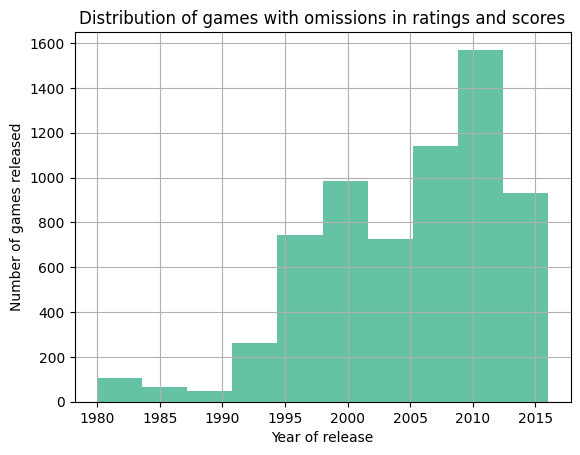

In [19]:
# setting colors for the seaborn library
sns.set_palette("Set2")

# creating a histogram
data.query("critic_score.isna() & user_score.isna() & rating.isna()")[
    "year_of_release"
].hist()

# assign axes and titles
plt.title("Distribution of games with omissions in ratings and scores")
plt.xlabel("Year of release")
plt.ylabel("Number of games released");

Unfortunately, many ratings and assessments are missing for the last few years. We cannot fill in the gaps in ratings with a logical value and, since there are a lot of them, we will not delete them in order to use the rows to study other metrics.

Note the gaps in the `rating` column. Gaps in this column may mean that the rating has not yet been assigned by the ESRB, or the game has not been released to the US or Canada at all.

Let's replace the gaps in this column with `not assigned` to better understand the patterns in this column.

In [20]:
data["rating"] = data["rating"].fillna("not assigned")

### Finding and removing duplicate records

**Finding exact duplicate rows**

In [21]:
data.duplicated().sum()

0

There are no completely duplicate rows. Let's try to find implicit duplicates, they may appear in columns with a text data type.
Such columns are `name`, `platform`, `genre` and `rating`.
The last three columns contain categorical data. Let's display unique values in these columns and check for errors.

In [22]:
# unique values of 'platform' column
data["platform"].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [23]:
# unique values of 'genre' column
data["genre"].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [24]:
# unique values of 'rating' column
data["rating"].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'not assigned'],
      dtype=object)

These three columns are all good.\
Let's move on to the `name` column. First, let's check if there are any duplicates that appeared due to case differences.

In [25]:
# check the number of duplicate values in the original column and if it is converted to lowercase
print(data["name"].duplicated().sum())
data["name"].str.lower().duplicated().sum()

5018


5018

The number of duplicates is equal, so there are no errors due to the register.

Let's try to find duplicate games. Since the game can be released on a different platform and in different years, we will sort by these three columns and look at the duplicates.

In [26]:
data[data[["name", "platform", "year_of_release"]].duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


One line was found, let's sort by this name and platform.

In [27]:
data.query('name == "Madden NFL 13" & platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Indeed, the information about the game has been duplicated. Since the first version has more information, we will delete the second one.

In [28]:
data = data.drop_duplicates(
    subset=["name", "platform", "year_of_release"], keep="first"
)

### Adding new column

Let's add a column of total sales `total_sales`, which we get by adding the columns:\
`na_sales` + `eu_sales` + `jp_sales` + `other_sales`

In [29]:
# calculation and adding a new column
data["total_sales"] = (
    data["na_sales"] + data["eu_sales"] + data["jp_sales"] + data["other_sales"]
)

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,not assigned,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,not assigned,31.38


### Interim conclusion

We have prepared the data for work:

* replaced column types with appropriate ones
* processed gaps: removed rows with gaps in the `year_of_release` column, left gaps in the `critic_score` columns. In the `user_score` column, changed the 'tbd' value to a NaN gap. In the `rating` column, replaced gaps with 'not assigned'.
* checked the dataset for obvious and hidden duplicates (removed an extra row)
* calculated total sales by region for each game and added the results to a new `total_sales` column

Numerous gaps were found in three columns containing ratings and reviews data. This may be due to the fact that the sources from which the data was taken do not contain information about these games, and there may also be no data for less popular games. The ESRB rating, being created in North America, probably covers games that have become popular in that hemisphere. It is possible that either the rating has not yet been assigned, or the game has not been released in the US or Canada at all. The `year_of_release` column may have gaps because the column was loaded from a source where filling in the year was optional, or the games were not in the data source.

## Exploratory data analysis

### Game releases by year

Let's apply the describe() method to the `year_of_release` column and build a histogram.

In [30]:
data["year_of_release"].describe()

count        16443.0
mean     2006.485921
std         5.875546
min           1980.0
25%           2003.0
50%           2007.0
75%           2010.0
max           2016.0
Name: year_of_release, dtype: Float64

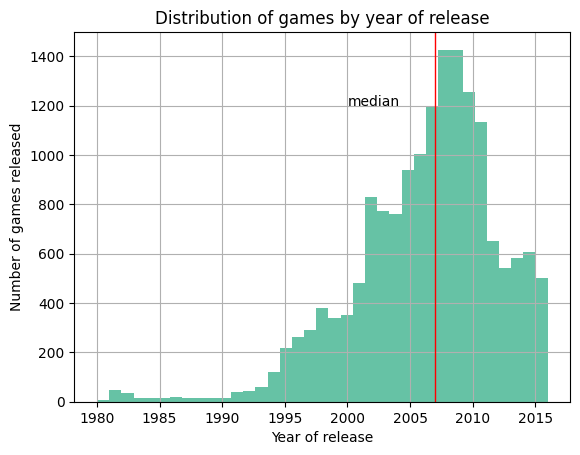

In [31]:
# create histogram
data["year_of_release"].hist(bins=37)

# assign axes and titles
plt.title("Distribution of games by year of release")
plt.xlabel("Year of release")
plt.ylabel("Number of games released")

# add median line
plt.axvline(data["year_of_release"].median(), color="r", linestyle="-", linewidth=1)
plt.text(2000, 1200, "median", rotation=0);

So, the data covers the period from 1980 to 2016. However, most games were released after 1995.

Let's list the top 10 years by the number of games.

In [32]:
data["year_of_release"].value_counts().head(10)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: count, dtype: Int64

**Observations:** The most productive in terms of game releases were the 2000s. 2008 and 2009 are far ahead. After 2009, there was a decline in the number of games released. This may be due to the global economic crisis that began in 2008.

It is also clear that after a sharp decline in 2012, the number is approximately at the same level. **For our study, we will take data for the last 5 years (2012-2016)**. It can be assumed that based on this more or less stable period for sales, we will be able to identify patterns relevant to the market.

### Sales by platform

To study the `platform` column, we will group the data by platforms and calculate the sales amount for each.

In [33]:
# create a pivot table of global sales across platforms
top_platforms = (
    data.groupby("platform")["total_sales"].sum().sort_values(ascending=False).head(10)
)
top_platforms = top_platforms.reset_index()
top_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


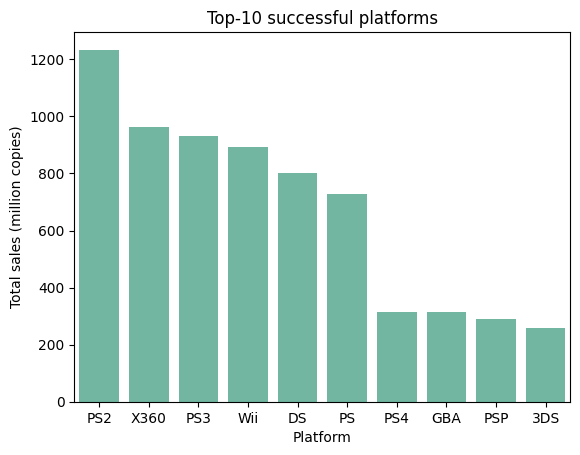

In [34]:
# create bar plot
sns.barplot(data=top_platforms, x="platform", y="total_sales")

# assign axes and titles
plt.title("Top-10 successful platforms")
plt.xlabel("Platform")
plt.ylabel("Total sales (million copies)");

**Observations:** The most sales are for games on the PS2 platform. The top 6 values ​​are sharply different from the previous ones. Let's plot a distribution by year for each of them.

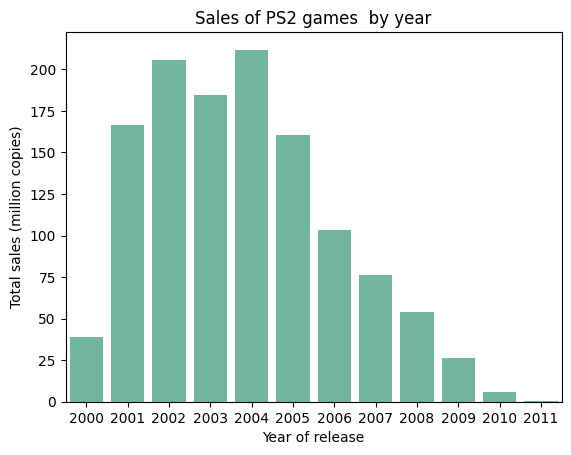

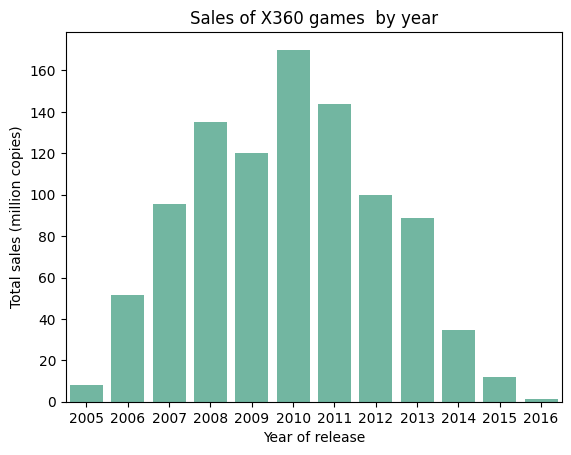

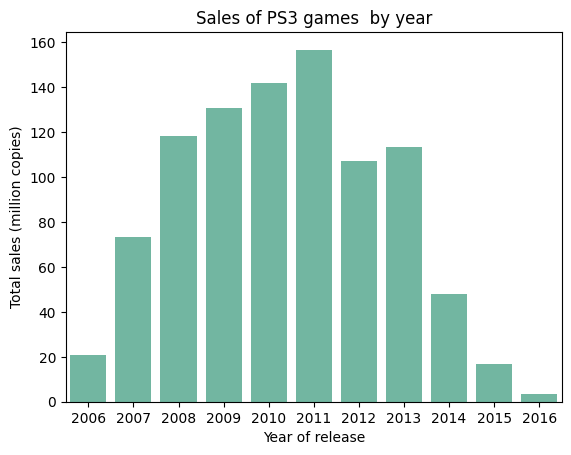

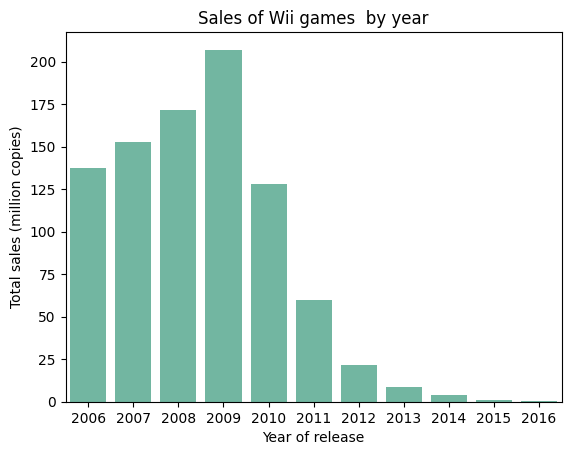

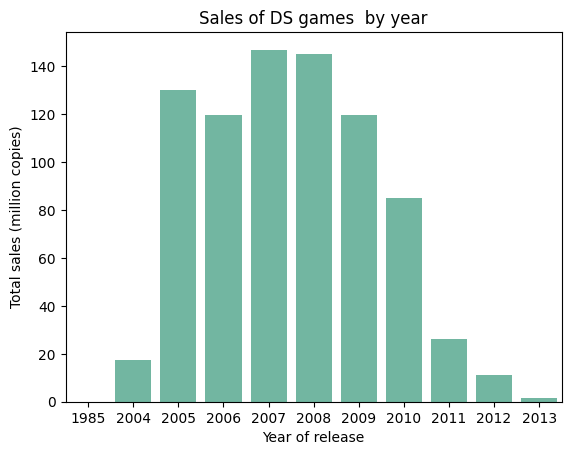

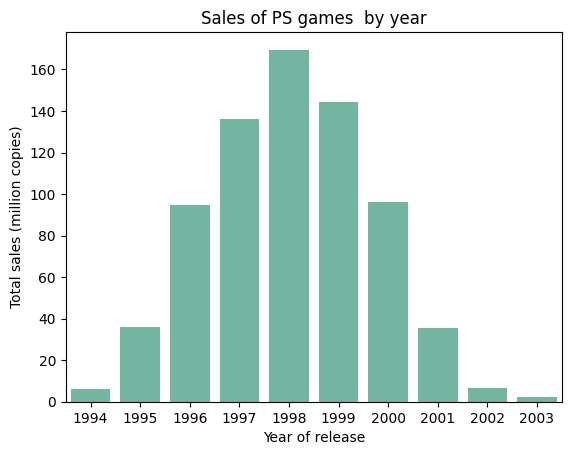

In [35]:
# creating a list of the top 6 successful platforms of all time
top_six_platforms_list = (
    data.groupby("platform")["total_sales"].sum().sort_values(ascending=False).index[:6]
)

# loop creates a barplot of sales distributions by year for each platform in the top 6 list
for platform in top_six_platforms_list:
    data_slice = data.query("platform == @platform")
    sns.barplot(
        data=data_slice, x="year_of_release", y="total_sales", estimator=sum, ci=None
    )
    # assign axes and titles
    plt.title("Sales of " + platform + " games  by year")
    plt.xlabel("Year of release")
    plt.ylabel("Total sales (million copies)")

    plt.show()

The DS platform may have rows for 1985, followed by a 19-year gap, let's check if there is an error here. Let's study these lines:

In [36]:
# filtering by platform condition - DS and year of release - 1985
data.query('platform == "DS" & year_of_release == 1985').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,not assigned,0.02


There is only one such game — Strongest Tokyo University Shogi DS. Let's check on the Internet when this game actually came out.

Judging by the information on several sites, <a href="https://gamefaqs.gamespot.com/ds/937837-saikyou-toudai-shogi-ds/data">for example here</a>, the game came out in 2007. Let's correct the data in the line.

In [37]:
# correct specific row year
data.loc[15957, "year_of_release"] = 2007

Now let's clarify the average active period of the platform's life. To do this, we will create a summary table where we will find out the first and last years of activity for each platform.

In [38]:
platforms_active_years = data.pivot_table(
    index="platform", values="year_of_release", aggfunc=["min", "max"]
)
platforms_active_years.columns = ["first_year", "last_years"]
platforms_active_years.head()

,first_year,last_years
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,2004,2013


Based on the columns, we will calculate the number of years the platforms have existed and calculate the median for the new column.

In [39]:
platforms_active_years["years_total"] = (
    platforms_active_years["last_years"] - platforms_active_years["first_year"] + 1
)

platforms_active_years["years_total"].median()

7.0

**Observations:**

* The average active lifespan of a platform is 7 years.
* Sales usually peak in the 4th - 6th year of a platform's existence
* All platforms studied (top 6 by sales) have seen a decline in sales of new games to date, and `PS2`, `DS` and `PS` have had no new releases at all in recent years.

### Creating a data slice for the current period

Above, we have already studied the distribution of game releases by year and decided to focus on the last five years (2012-2016) to build a forecast for 2017.

In [40]:
# saving actual time period data slice into variable
actual_data = data.query("year_of_release > 2011")

### Search for potentially profitable platforms

First, let's find out which platforms have released games over the past 5 years. Let's specify the most productive ones.

In [41]:
print(
    "Active platforms over the last 5 years:",
    len(actual_data["platform"].unique()),
    "in total",
)
actual_data["platform"].value_counts()

Active platforms over the last 5 years: 11 in total


platform
PS3     492
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: count, dtype: int64

In total, there have been 11 active platforms over the past five years. Above, we have already identified the most profitable platforms and made graphs of sales distribution by year. Let's do a similar analysis for all 11 platforms for the current data slice:

Let's find out the sales distribution:

In [42]:
# grouping by platform and calculating the amount of global sales
actual_platforms = (
    actual_data.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
)
actual_platforms = actual_platforms.reset_index()
actual_platforms

,platform,total_sales
0,PS4,314.14
1,PS3,288.78
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


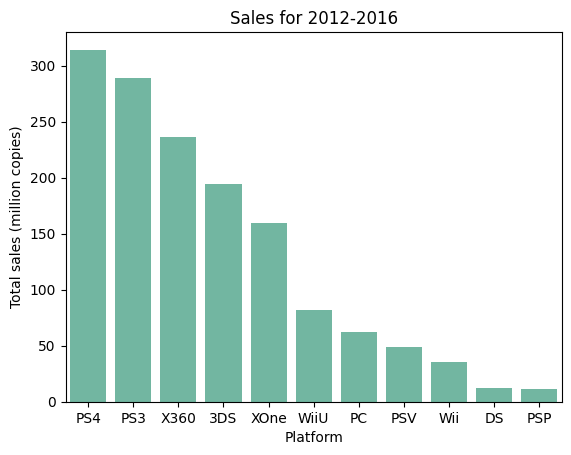

In [43]:
# create bar plot
sns.barplot(data=actual_platforms, x="platform", y="total_sales")

# assign axes and title
plt.title("Sales for 2012-2016")
plt.xlabel("Platform")
plt.ylabel("Total sales (million copies)");

Top-5 platforms by sales: `PS4`, `PS3`, `X360`, `3DS`, `XOne`

Now let's plot sales distribution charts by year for each platform. Despite the fact that platforms like DS and PSP brought in significantly less revenue than the top 5, we won't write them off. Perhaps these are completely new platforms that are just gaining momentum?

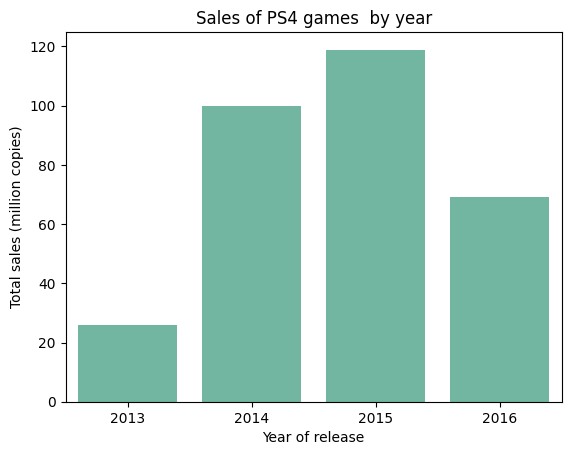

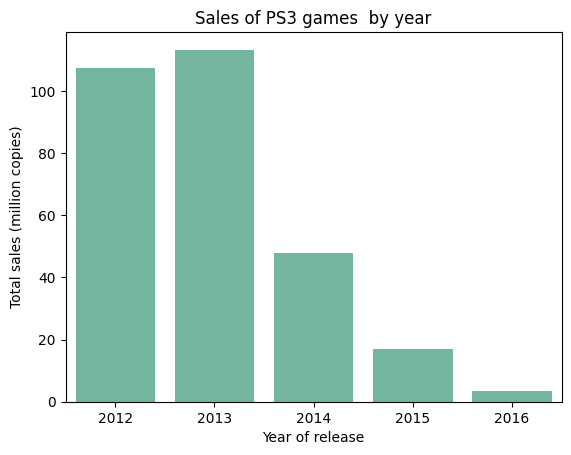

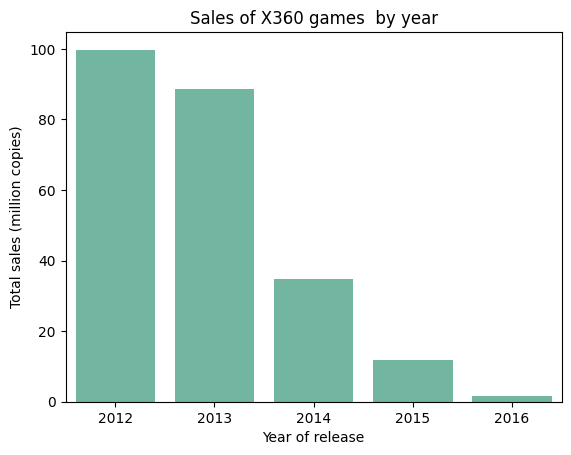

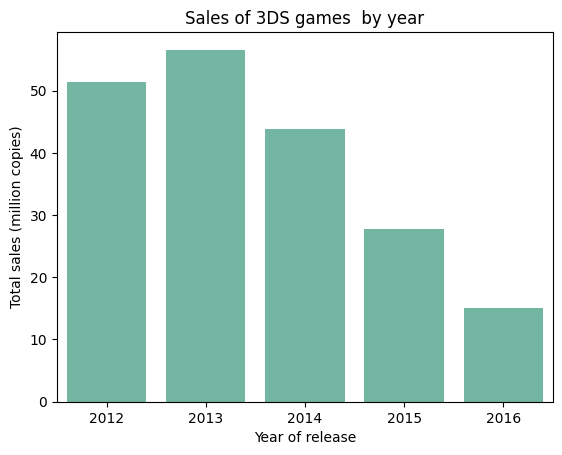

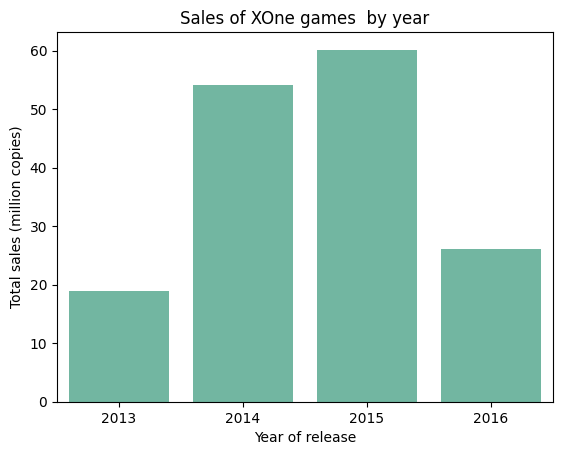

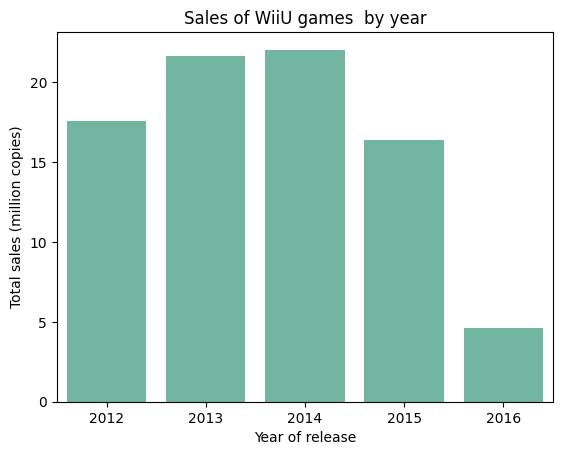

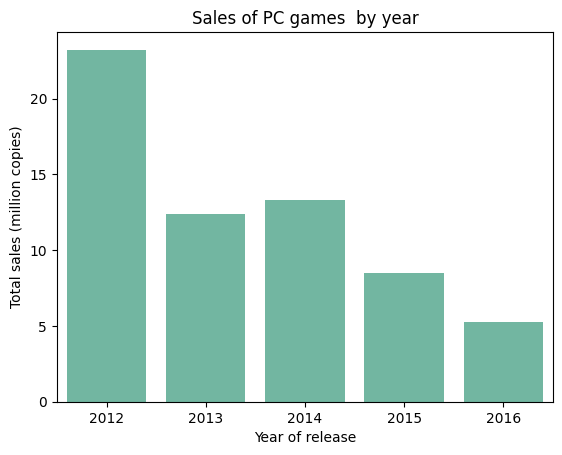

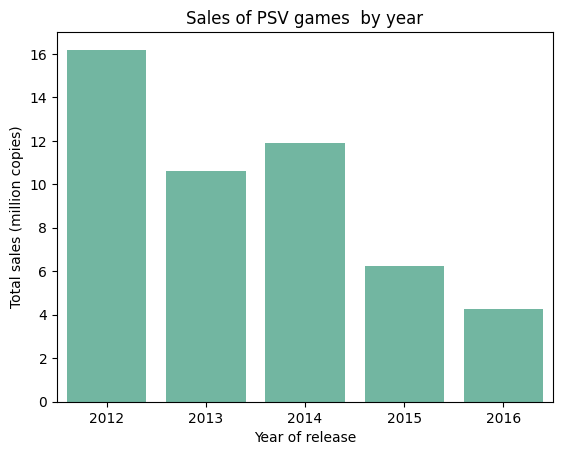

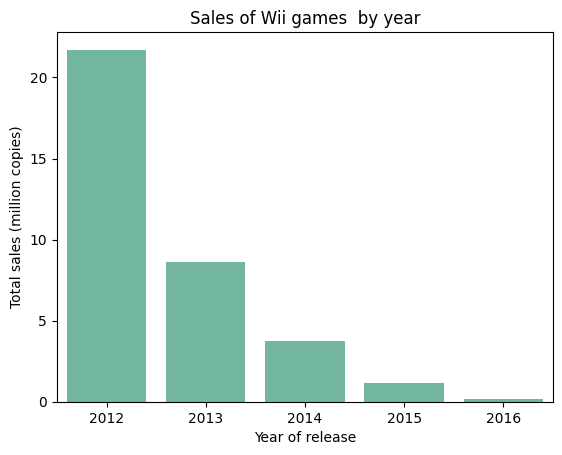

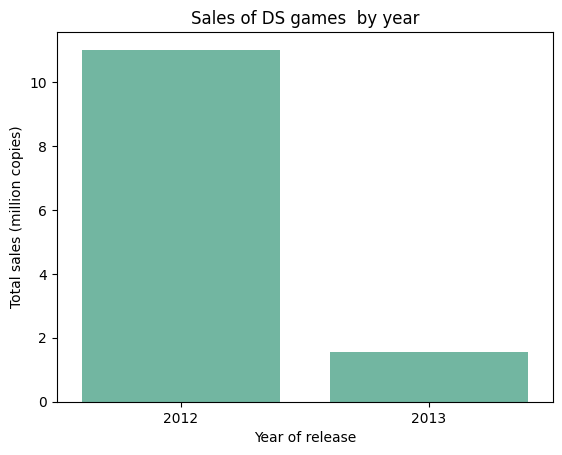

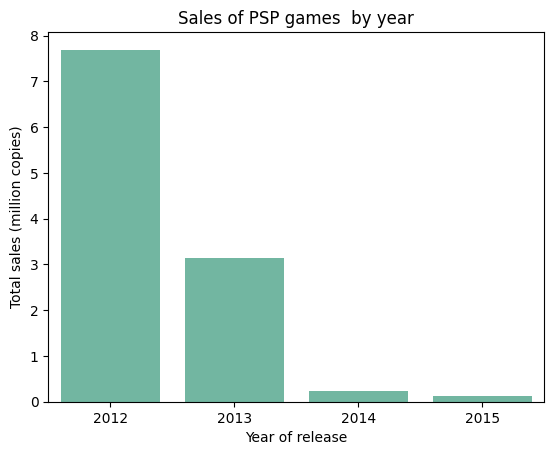

In [44]:
# create list of platform names
platforms_list = (
    actual_data.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .index
)

# the cycle builds a barplot for each platform from the list with game sales by year of the current time period
for platform in platforms_list:
    data_slice = actual_data.query("platform == @platform")
    sns.barplot(
        data=data_slice, x="year_of_release", y="total_sales", estimator=sum, ci=None
    )

    # assign axes and title
    plt.title("Sales of " + platform + " games  by year")
    plt.xlabel("Year of release")
    plt.ylabel("Total sales (million copies)")

    plt.show()

**Observations:**

Since the data for 2016 may be incomplete, the most important factors to look for potentially profitable platforms are high sales in 2015 and a general upward trend in sales.

Based on these criteria, platforms such as `PS4` and `XOne` can be identified.

Both platforms have seen sales growth in recent years. Let's clarify in which year these platforms appeared:

In [45]:
print(
    "PS4 was released in ",
    data.query('platform == "PS4"')["year_of_release"].min(),
    "year",
)
print(
    "XOne was released in ",
    data.query('platform == "XOne"')["year_of_release"].min(),
    "year",
)

PS4 was released in  2013 year
XOne was released in  2013 year


**Observations:**
PS4 and XOne appeared in 2013, above we found out that the peak of sales of platforms falls on average on the 4-6 year of existence. So we can assume that these platforms have several more years of successful releases ahead.

### Visualization of global game sales by platform

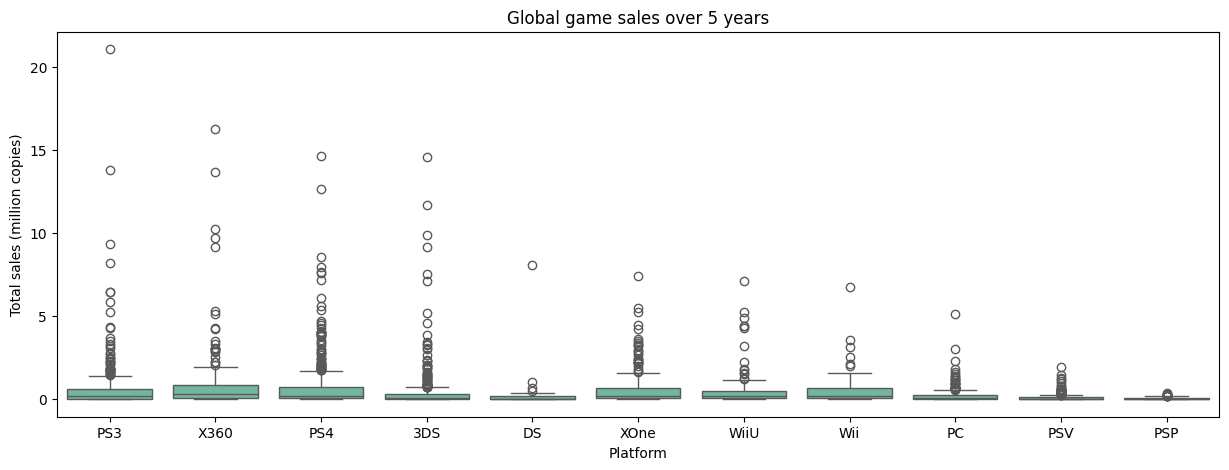

In [46]:
# create boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=actual_data, x="platform", y="total_sales")

# assign axes and title
plt.title("Global game sales over 5 years")
plt.xlabel("Platform")
plt.ylabel("Total sales (million copies)");

Let's trim off numerous outliers by setting a limit on the y-axis and sort the boxplots in descending order of medians.

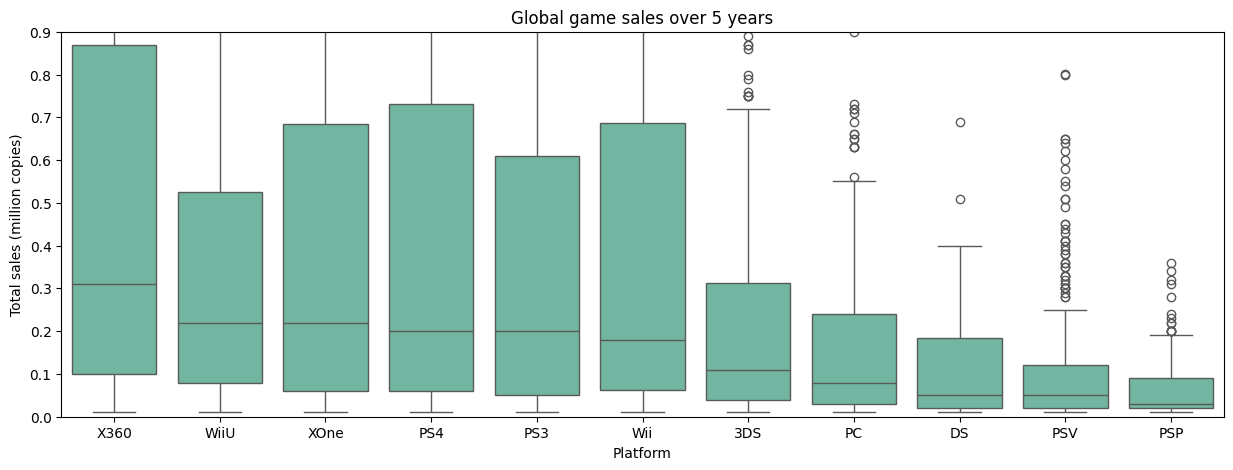

In [47]:
# create a median sort order
my_order = (
    actual_data.groupby(by=["platform"])["total_sales"]
    .median()
    .sort_values(ascending=False)
    .index
)

# create boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=actual_data, x="platform", y="total_sales", order=my_order)
# set the limit on the y axis
plt.ylim(0, 0.9)

# assign axes and title
plt.title("Global game sales over 5 years")
plt.xlabel("Platform")
plt.ylabel("Total sales (million copies)");

**Observations:**
Over the past 5 years, on average, the most revenue from global sales has come from games for the Xbox 360 platform.
Also, all platforms had outliers - hit games that brought in revenue significantly higher than average.

### Sales and reviews dependency

To study dependencies, we will take the platform from the current period, for which we have the most data on reviews. Let's remember that there are quite a lot of gaps in the columns we are interested in.

In [48]:
# calculation of top 5 platforms by number of games (lines) and display of top 5 on the screen
(
    actual_data.query("~critic_score.isna() & ~user_score.isna()")
    .groupby("platform")["total_sales"]
    .count()
    .sort_values(ascending=False)
    .head()
)

platform
PS4     249
PS3     212
PC      197
X360    171
XOne    165
Name: total_sales, dtype: int64

The most information about reviews is on the PS4 platform. We will use it to study their impact on sales.

In [49]:
# create separate environments variables for reviews from critics and users, filter out gaps
critic_score_slice = actual_data.query("~critic_score.isna()")[
    ["platform", "critic_score", "total_sales"]
].copy()
user_score_slice = actual_data.query("~user_score.isna()")[
    ["platform", "user_score", "total_sales"]
].copy()

# change critic_score type to int64
critic_score_slice["critic_score"] = critic_score_slice["critic_score"].astype("int64")

# create separate slices for each score category with platform — PS4
ps4_critic_score_slice = critic_score_slice.query('platform == "PS4"')
ps4_user_score_slice = user_score_slice.query('platform == "PS4"')

First, let's examine the **correlation between sales and critic reviews**:

* make a scatterplot
* calculate the Pearson correlation coefficient


The Pearson coefficient between sales and critic reviews (PS4 platform) is: 0.4065679020617816


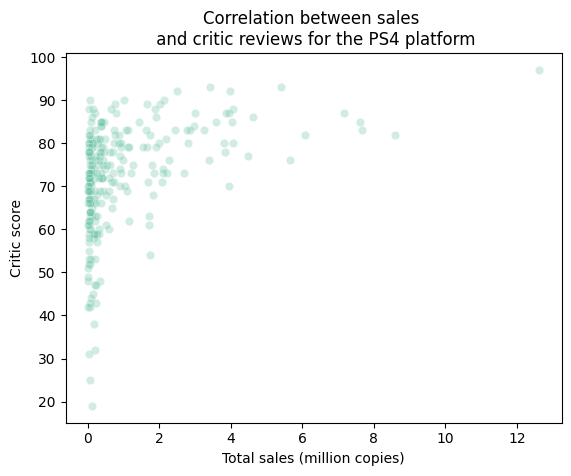

In [50]:
print()
# correlation calculation
print(
    "The Pearson coefficient between sales and critic reviews (PS4 platform) is:",
    ps4_critic_score_slice["total_sales"].corr(ps4_critic_score_slice["critic_score"]),
)

# create scatterplot
sns.scatterplot(
    data=ps4_critic_score_slice, x="total_sales", y="critic_score", alpha=0.3
)

# assign axes and title
plt.title("Correlation between sales \n and critic reviews for the PS4 platform")
plt.xlabel("Total sales (million copies)")
plt.ylabel("Critic score");

Next let's examine the **correlation of sales and user reviews**:

* make a scatter plot for the top
* calculate the Pearson correlation coefficient


The Pearson coefficient between sales and user reviews (PS4 platform) is: -0.03195711020455643


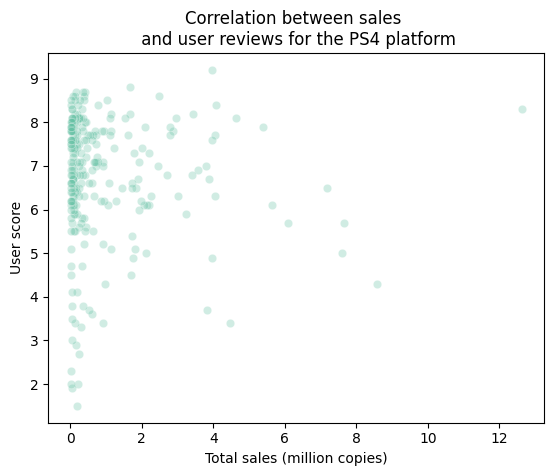

In [51]:
print()
# correlation calculation
print(
    "The Pearson coefficient between sales and user reviews (PS4 platform) is:",
    ps4_user_score_slice["total_sales"].corr(ps4_user_score_slice["user_score"]),
)

# создание и оформление графика
sns.scatterplot(data=ps4_user_score_slice, x="total_sales", y="user_score", alpha=0.3)

plt.title("Correlation between sales \n and user reviews for the PS4 platform")
plt.xlabel("Total sales (million copies)")
plt.ylabel("User score");

**Conclusions:**

We studied the relationship between sales and reviews for the PS4 platform. The following conclusions can be made:

* there is a weak correlation between sales and critic reviews (0.4).
* there is no clear relationship between sales and user reviews (-0.03).

From the diagram, you can see that the "hit" games that brought in the most profit are always highly rated by critics, but can receive an average rating from users.

---

**Let's clarify whether this trend is repeated on other platforms:**

* we will make scatter plots for the top 5 active platforms (not including the PS4 studied above)
* we will calculate the Pearson correlation coefficient





Pearson coefficient between game sales on PS3 and reviews from critics 0.33415175755098564
Pearson coefficient between game sales on PS3 and reviews from users -0.006205767686051493


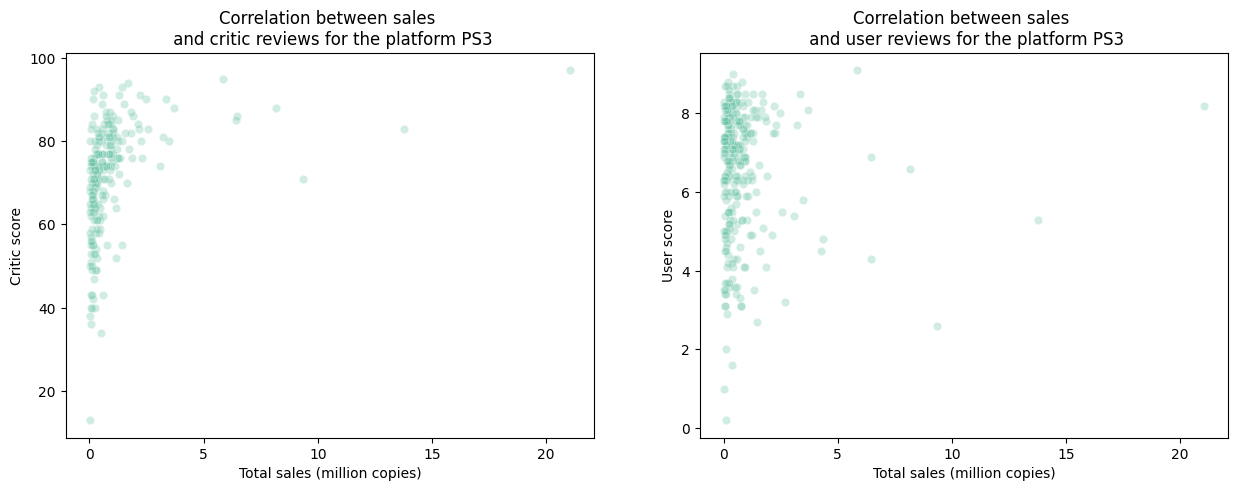





Pearson coefficient between game sales on X360 and reviews from critics 0.36057348885073387
Pearson coefficient between game sales on X360 and reviews from users 0.006163978646213357


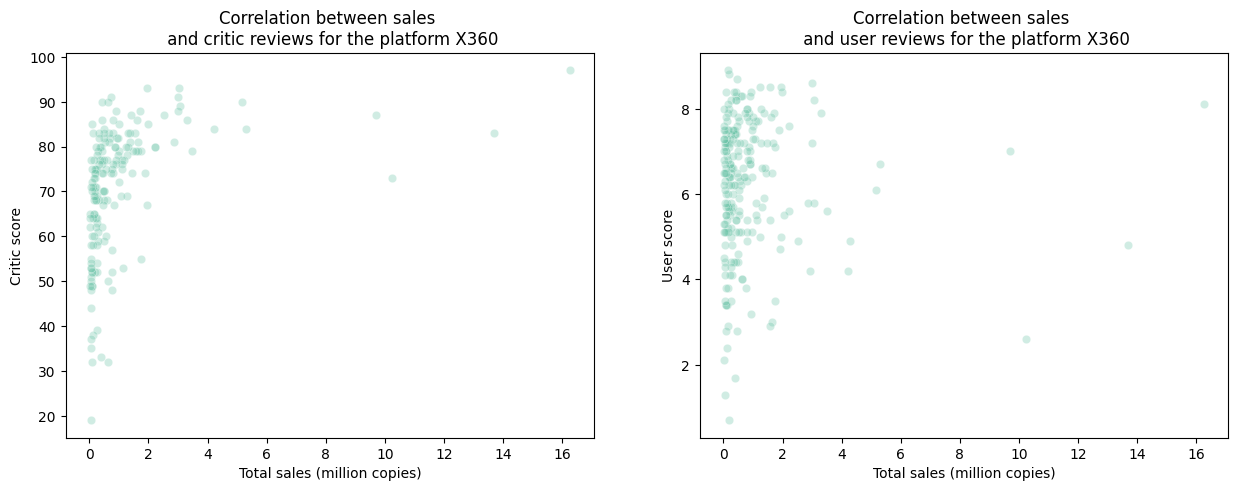





Pearson coefficient between game sales on 3DS and reviews from critics 0.32080286953607845
Pearson coefficient between game sales on 3DS and reviews from users 0.19758263411038596


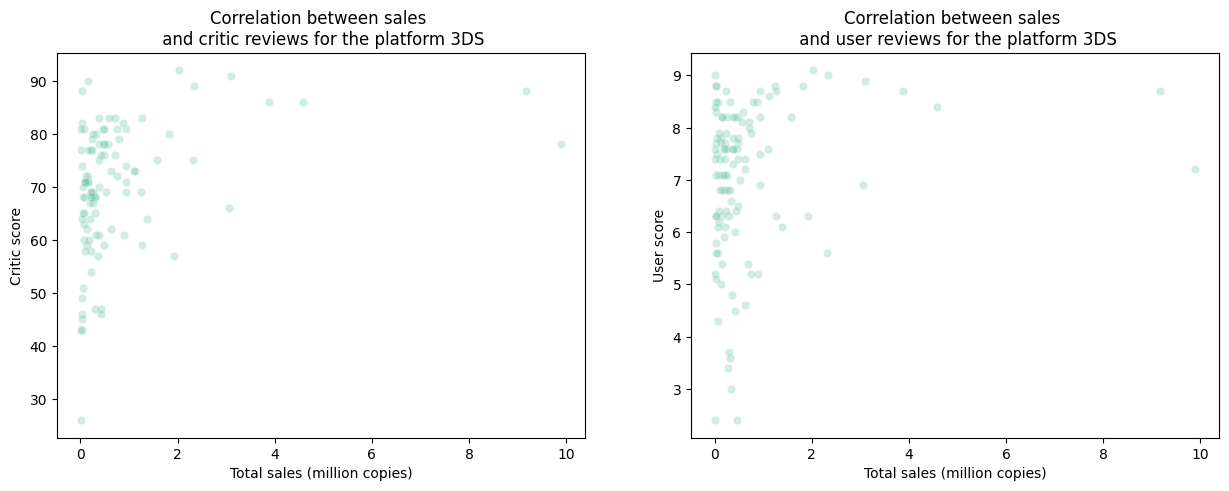





Pearson coefficient between game sales on XOne and reviews from critics 0.41699832800840164
Pearson coefficient between game sales on XOne and reviews from users -0.06892505328279415


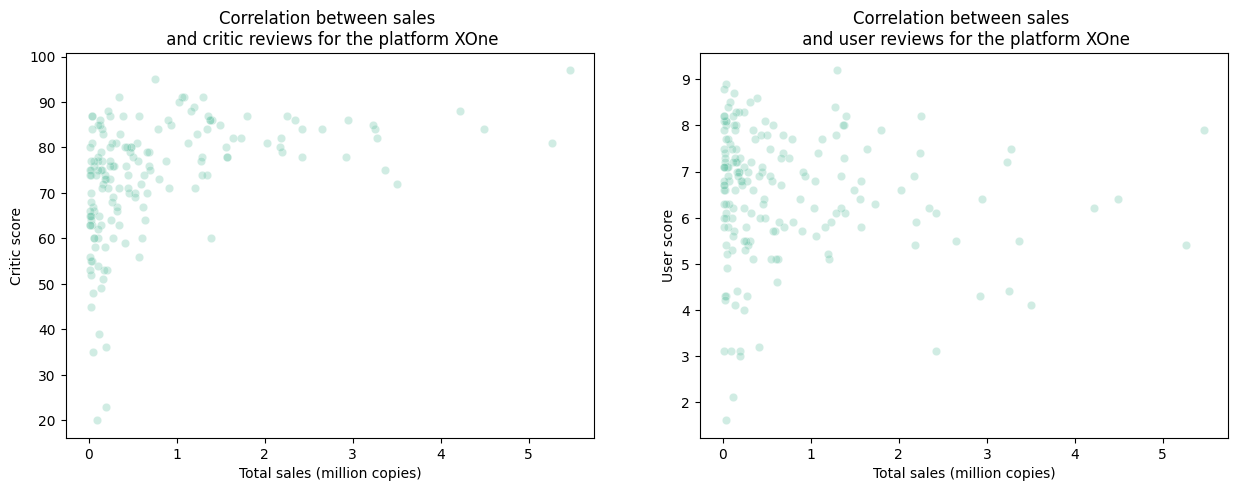





Pearson coefficient between game sales on WiiU and reviews from critics 0.3483797601201749
Pearson coefficient between game sales on WiiU and reviews from users 0.4002190202148617


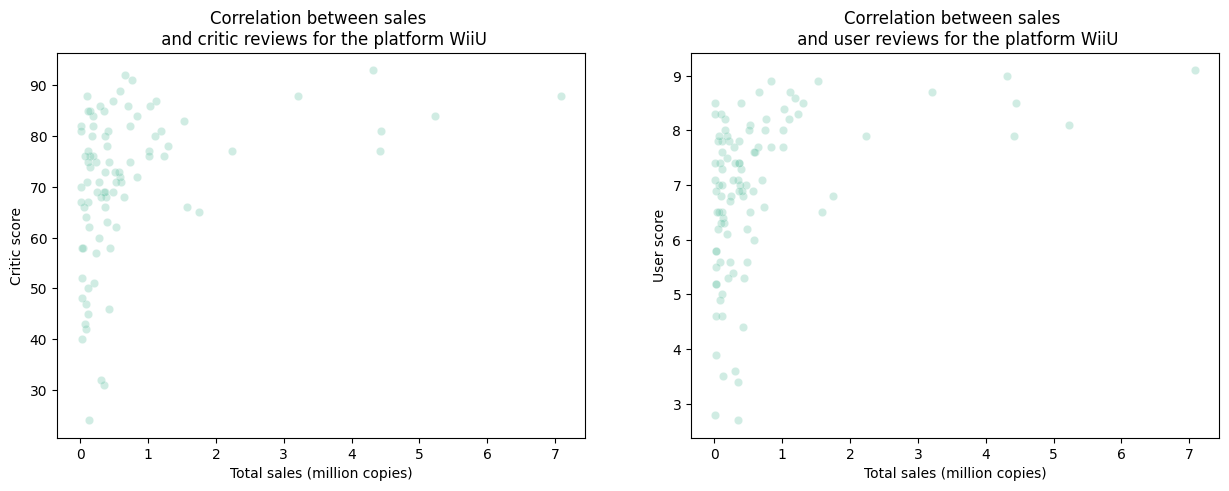

In [52]:
# creating a list of top 5 active platforms (not including PS4)
cor_platforms_list = (
    actual_data.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .index[1:6]
)

# the loop creates a row with 2 graphs for each platform from top-5 list
for platform in cor_platforms_list:

    data_slice1 = critic_score_slice.query("platform == @platform")
    data_slice2 = user_score_slice.query("platform == @platform")

    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    sns.scatterplot(
        ax=axes[0], data=data_slice1, x="total_sales", y="critic_score", alpha=0.3
    )
    axes[0].set_title(
        "Correlation between sales \n and critic reviews for the platform " + platform
    )
    axes[0].set_xlabel("Total sales (million copies)")
    axes[0].set_ylabel("Critic score")

    sns.scatterplot(
        ax=axes[1], data=data_slice2, x="total_sales", y="user_score", alpha=0.3
    )
    axes[1].set_title(
        "Correlation between sales \n and user reviews for the platform " + platform
    )
    axes[1].set_xlabel("Total sales (million copies)")
    axes[1].set_ylabel("User score")

    print("\n\n\n")
    print(
        "Pearson coefficient between game sales on",
        platform,
        "and reviews from critics",
        data_slice1["total_sales"].corr(data_slice1["critic_score"]),
    )
    print(
        "Pearson coefficient between game sales on",
        platform,
        "and reviews from users",
        data_slice2["total_sales"].corr(data_slice2["user_score"]),
    )

    plt.show()

**Conclusions:**

We studied the dependencies of sales and reviews for 5 active platforms for the current period and compared them with the conclusions for the PS4 platform that we made earlier:

The results were similar:

* there is a weak correlation between sales and critic reviews (0.32-0.41, while for PS4 it is 0.4).
* there is no obvious relationship between sales and user reviews. The WiiU platform stands out with a more pronounced correlation (0.4)

Nevertheless, one pattern is visible in the graphs: games with ratings below average rarely achieve high sales (> 0.5 million copies).

### Distribution of games by genre

To study the distribution of games by genre, we will make a summary table by genre for the last 5 years, in which for each genre we will calculate:
* total profit;
* average profit from game sales;
* number of games of this genre.

In [53]:
# create pivot table
genres_pivot = actual_data.pivot_table(
    index="genre", values="total_sales", aggfunc=["sum", "mean", "count"]
)
genres_pivot.columns = ["total_sales", "sales_mean", "total_count"]

genres_pivot.sort_values(by="total_sales", ascending=False)

,total_sales,sales_mean,total_count
genre,,,
Action,441.12,0.427856,1031
Shooter,304.73,1.296723,235
Role-Playing,192.80,0.521081,370
Sports,181.06,0.678127,267
Misc,85.04,0.442917,192
Platform,61.00,0.717647,85
Racing,53.50,0.465217,115
Fighting,44.49,0.408165,109
Simulation,35.12,0.439000,80


Visualize all three columns on the chart.

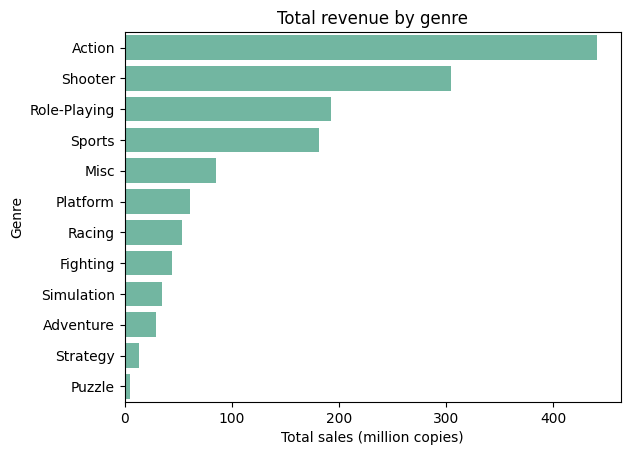

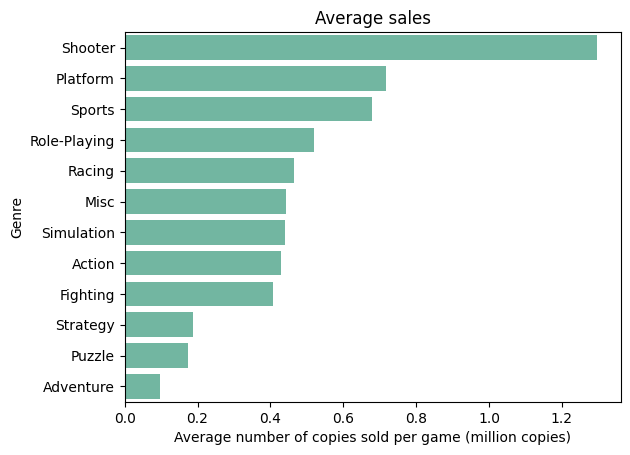

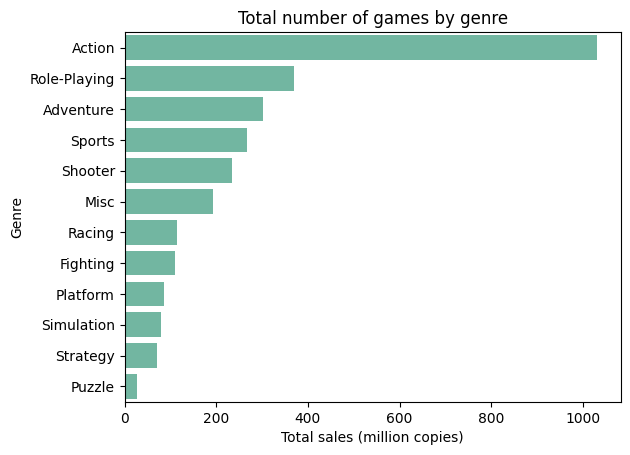

In [54]:
genres_pivot = genres_pivot.reset_index()

# create bar plots
sns.barplot(
    data=genres_pivot.sort_values(by="total_sales", ascending=False),
    y="genre",
    x="total_sales",
)
plt.title("Total revenue by genre")
plt.xlabel("Total sales (million copies)")
plt.ylabel("Genre")

plt.show()

sns.barplot(
    data=genres_pivot.sort_values(by="sales_mean", ascending=False),
    y="genre",
    x="sales_mean",
)

plt.title("Average sales")
plt.xlabel("Average number of copies sold per game (million copies)")
plt.ylabel("Genre")

plt.show()

sns.barplot(
    data=genres_pivot.sort_values(by="total_count", ascending=False),
    y="genre",
    x="total_count",
)

plt.title("Total number of games by genre")
plt.xlabel("Total sales (million copies)")
plt.ylabel("Genre");

Let's build a chart of the range of game sales broken down by genre.

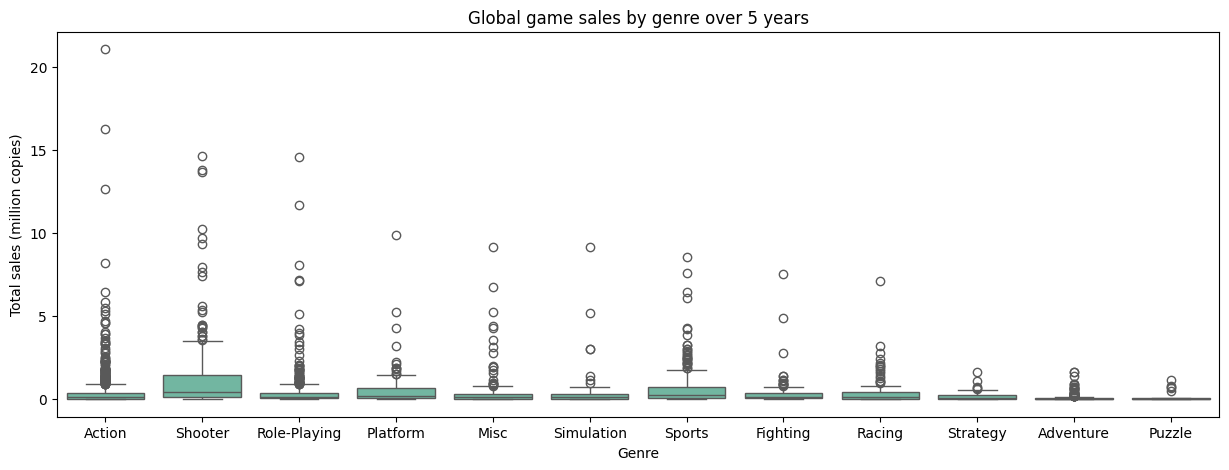

In [55]:
# create boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=actual_data, x="genre", y="total_sales")

# assign axes and title
plt.title("Global game sales by genre over 5 years")
plt.xlabel("Genre")
plt.ylabel("Total sales (million copies)");

Let's trim outliers by setting a limit on the `y` axis, and sort the boxplots in descending order of the median

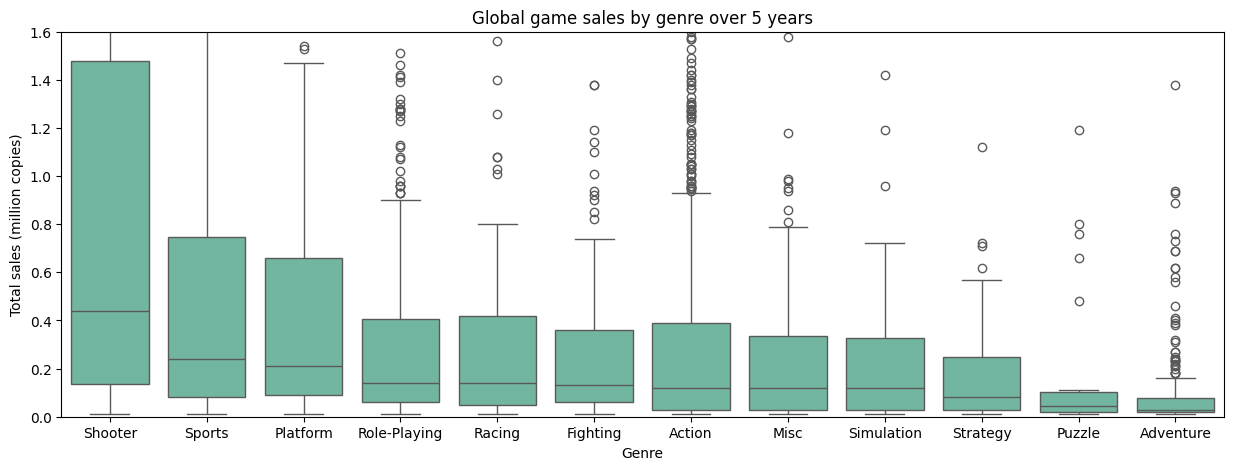

In [56]:
# create a median sort order
my_order = (
    actual_data.groupby(by=["genre"])["total_sales"]
    .median()
    .sort_values(ascending=False)
    .index
)

# create boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=actual_data, x="genre", y="total_sales", order=my_order)

# set the limit on the 'y' axis
plt.ylim(0, 1.6)

# assign axes and title
plt.title("Global game sales by genre over 5 years")
plt.xlabel("Genre")
plt.ylabel("Total sales (million copies)");

In [57]:
# calculate medians
actual_data.groupby(by=["genre"])["total_sales"].median().sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

**Observations:**

* We can highlight several of the most profitable genres, these are `Shooter` `Sports` and `Platform`.
* The games of the `Shooter` genre stand out from the rest.
* In turn, the genres `Puzzle` and `Adventure` are the least popular.
* It is interesting that despite the low profits, a large number of games in the `Adventure` genre are released (in third place in the rating).



### Interim conclusion

* The 2000s were the most productive years in terms of the number of games released. They were followed by 2008 and 2009. After a sharp decline in 2012, the number of games released remains at about the same level.

* The average active life of a gaming platform is about 10 years. Sales usually peak in the 4th to 6th year of the platform's existence. All platforms studied are currently experiencing a decline in sales of new games, and the PS2, DS and PS have not released any new releases in recent years.

* For our study, we used data for the last five years (from 2012 to 2016).

* We studied the sales of gaming platforms for the current period and singled out the PS4 and XOne as potentially profitable.

* Over the past five years, the Xbox 360 platform has generated the most revenue from global sales on average. Each platform has its own hits that sell significantly better than other games on that platform.

* We found a weak relationship between critics' ratings and sales, and found that there is no clear connection between user ratings and sales. These dependencies were tested for both the popular PS4 platform and for data from the other five profitable platforms.

* The most profitable genres were Shooter, Sports, and Platform, while the least profitable was Adventure.

## Creating a user profile for each region

To create a user profile, we will specify popular genres and platforms for the Japanese, European, and North American markets, and also find out whether the ESRB rating affects sales.

### Most popular platforms (top 5)

Let's create a summary table of sales for each region by platform.

In [58]:
# create pivot table
sales_pivot = actual_data.pivot_table(
    index="platform", values=["na_sales", "eu_sales", "jp_sales"], aggfunc="sum"
)

sales_pivot

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.85,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


Find the top 5 popular platforms in the markets:

In [59]:
# sorting the data slice in descending order of sales
print(
    "Top 5 platforms in the European market:",
    sorted(sales_pivot["eu_sales"].sort_values(ascending=False).head().index),
)
print(
    "Top 5 platforms in the North American market:",
    sorted(sales_pivot["na_sales"].sort_values(ascending=False).head().index),
)
print(
    "Top 5 platforms in the Japanese market:",
    sorted(sales_pivot["jp_sales"].sort_values(ascending=False).head().index),
)

Top 5 platforms in the European market: ['3DS', 'PS3', 'PS4', 'X360', 'XOne']
Top 5 platforms in the North American market: ['3DS', 'PS3', 'PS4', 'X360', 'XOne']
Top 5 platforms in the Japanese market: ['3DS', 'PS3', 'PS4', 'PSV', 'WiiU']


**Observations:** The top 5 platforms are the same for Europe and North America, but the Japanese market has a slightly different distribution. There are no XBox consoles in the top 5: `X360` and `XOne`, but there are `PSV` (PlayStation Vita), `WiiU` (Nintendo console), both of which were developed in Japan.

---

Let's create pie charts to visualise the shares of the top platforms for each market.

In [60]:
# create a table for each market, combine the shares of platforms not in the top 5 into the 'others' category
eu_sales_top5 = sales_pivot["eu_sales"].sort_values(ascending=False)[:5]
eu_sales_others = sales_pivot["eu_sales"].sort_values(ascending=False)[5:].sum()
eu_sales_top5["Others"] = eu_sales_others

na_sales_top5 = sales_pivot["na_sales"].sort_values(ascending=False)[:5]
na_sales_others = sales_pivot["na_sales"].sort_values(ascending=False)[5:].sum()
na_sales_top5["Others"] = na_sales_others

jp_sales_top5 = sales_pivot["jp_sales"].sort_values(ascending=False)[:5]
jp_sales_others = sales_pivot["jp_sales"].sort_values(ascending=False)[5:].sum()
jp_sales_top5["Others"] = jp_sales_others

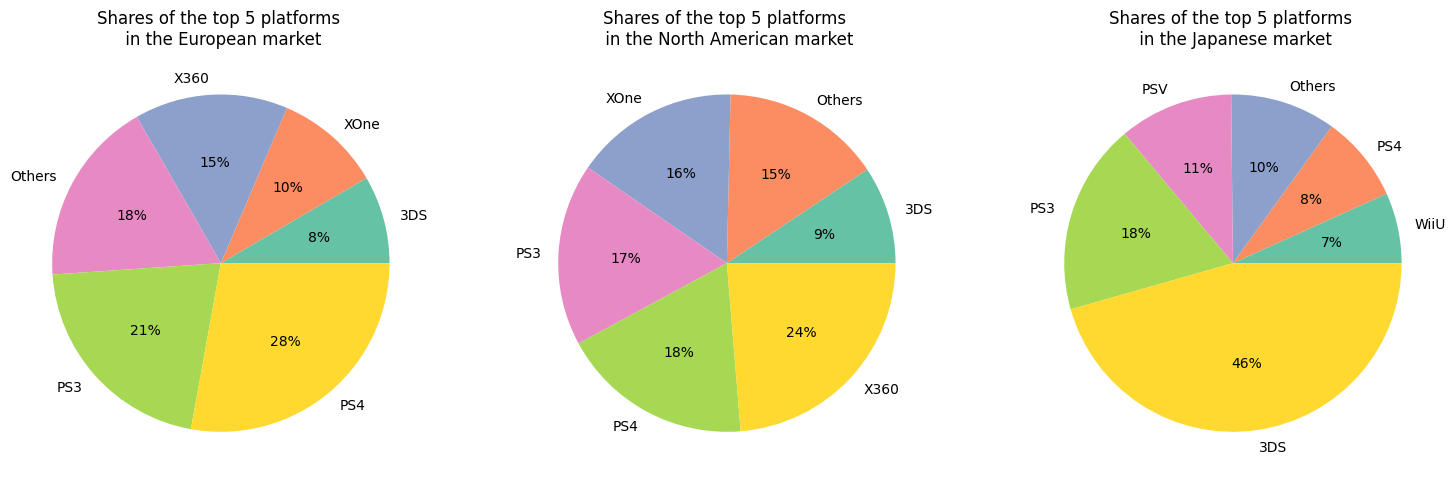

In [61]:
# creating and formatting graphs from the tables obtained above and displaying them on the screen in a row
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)

ax = axes[0]
ax.pie(
    eu_sales_top5.sort_values(),
    autopct="%.0f%%",
    labels=eu_sales_top5.sort_values().index,
)
ax.set_title("Shares of the top 5 platforms \n in the European market")

ax = axes[1]
ax.pie(
    na_sales_top5.sort_values(),
    autopct="%.0f%%",
    labels=na_sales_top5.sort_values().index,
)
ax.set_title("Shares of the top 5 platforms \n in the North American market")

ax = axes[2]
ax.pie(
    jp_sales_top5.sort_values(),
    autopct="%.0f%%",
    labels=jp_sales_top5.sort_values().index,
)
ax.set_title("Shares of the top 5 platforms \n in the Japanese market")

plt.show()

**Observations:**

* In Europe, the most popular platform is the PS4, which we identified as potentially profitable.
* In North America, the most popular platform is the X360, which we also identified as potentially profitable.
* In Japan, the 3DS from Nintendo is in the lead. We have previously analyzed the distribution of game sales for this platform by year and know that sales have been gradually declining lately. Given the popularity of this manufacturer's platforms in Japan, it is worth paying attention to the new Nintendo Switch console, presented in October of this year.

### Most popular genres

Let's create a pivot table of sales for each region by genre.

In [62]:
genres_pivot = actual_data.pivot_table(
    index="genre", values=["na_sales", "eu_sales", "jp_sales"], aggfunc="sum"
)

genres_pivot

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


Find out the top 5 genres in the markets.

In [63]:
print(
    "Top 5 genres in the European market:",
    sorted(genres_pivot["eu_sales"].sort_values(ascending=False).head().index),
)

print(
    "Top 5 genres in the North American market:",
    sorted(genres_pivot["na_sales"].sort_values(ascending=False).head().index),
)

print(
    "Top 5 genres in the Japanese market:",
    sorted(genres_pivot["jp_sales"].sort_values(ascending=False).head().index),
)

Top 5 genres in the European market: ['Action', 'Racing', 'Role-Playing', 'Shooter', 'Sports']
Top 5 genres in the North American market: ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
Top 5 genres in the Japanese market: ['Action', 'Fighting', 'Misc', 'Role-Playing', 'Simulation']


**Observations:**

The Action and Role-Playing genres are popular in all markets. \
In North America and Japan, the top five most popular genres also include Misc (Miscellaneous Games), which includes games that do not fit into other categories. Since this is not a separate genre, but a combination of different niche genres, it is logical to remove this category from the top 5.

Let's clarify the top 5 for Japan and North America:

In [64]:
# sort sales by genre for North America, highlight top 6 and remove Misc
na_top5 = genres_pivot["na_sales"].sort_values(ascending=False).head(6).index.to_list()
na_top5.remove("Misc")

# sort sales by genre Japan, highlight top 6 and remove Misc
jp_top5 = genres_pivot["jp_sales"].sort_values(ascending=False).head(6).index.to_list()
jp_top5.remove("Misc")

# display new top 5 on screen
print(
    "Top 5 genres in the North American market excluding the Misc category: \n",
    na_top5,
)
print()
print("Top 5 genres in the Japan market excluding the Misc category: \n", jp_top5)

Top 5 genres in the North American market excluding the Misc category: 
 ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Platform']

Top 5 genres in the Japan market excluding the Misc category: 
 ['Role-Playing', 'Action', 'Simulation', 'Fighting', 'Shooter']


* In North America, the new top five genre is `Platform`
* In Japan, the new top five genre is `Shooter`

Let's visualize the shares of the top genres for each market on a pie chart.

In [65]:
# create a table for each market, combine the shares of genres not included in the top 5 into the category 'other'
eu_genres_top5 = genres_pivot["eu_sales"].sort_values(ascending=False)[:5]
eu_genres_others = genres_pivot["eu_sales"].sort_values(ascending=False)[5:].sum()
eu_genres_top5["Others"] = eu_genres_others

na_genres_top5 = genres_pivot["na_sales"].sort_values(ascending=False)[:6]
na_genres_top5 = na_genres_top5[na_genres_top5.index != "Misc"]
na_genres_others = (
    genres_pivot["na_sales"].sort_values(ascending=False)[6:].sum()
    + genres_pivot["na_sales"]["Misc"]
)
na_genres_top5["Others"] = na_genres_others

jp_genres_top5 = genres_pivot["jp_sales"].sort_values(ascending=False)[:6]
jp_genres_top5 = jp_genres_top5[jp_genres_top5.index != "Misc"]
jp_genres_others = (
    genres_pivot["jp_sales"].sort_values(ascending=False)[6:].sum()
    + genres_pivot["jp_sales"]["Misc"]
)
jp_genres_top5["Others"] = jp_genres_others

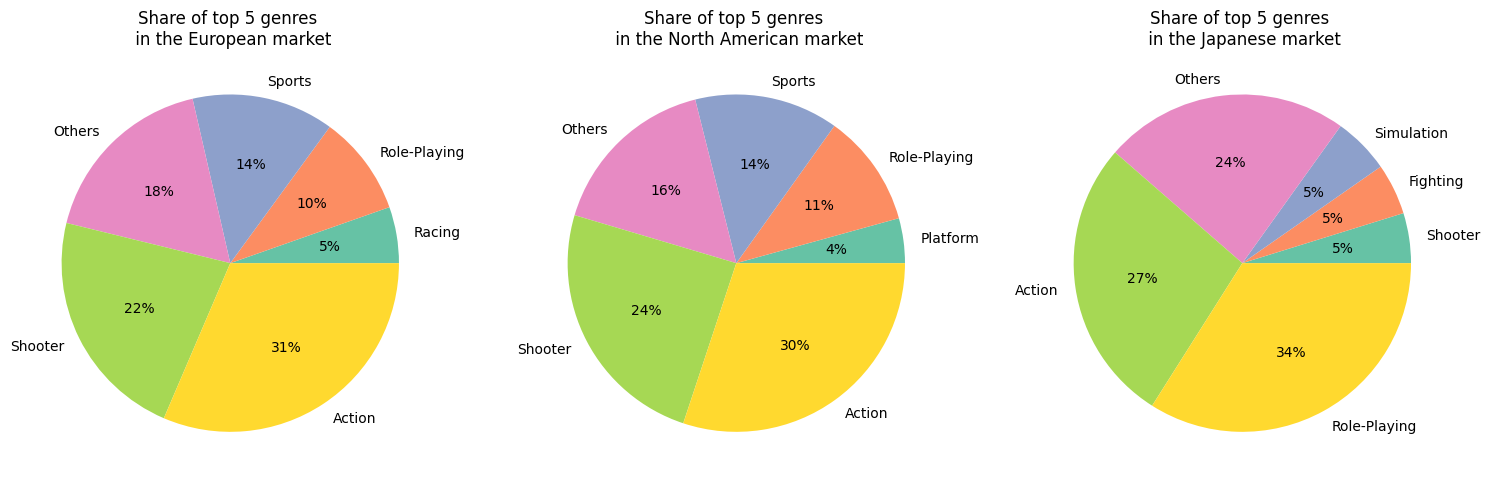

In [66]:
# creating pie charts
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)

ax = axes[0]
ax.pie(
    eu_genres_top5.sort_values(),
    autopct="%.0f%%",
    labels=eu_genres_top5.sort_values().index,
)
ax.set_title("Share of top 5 genres \n in the European market")

ax = axes[1]
ax.pie(
    na_genres_top5.sort_values(),
    autopct="%.0f%%",
    labels=na_genres_top5.sort_values().index,
)
ax.set_title("Share of top 5 genres \n in the North American market")

ax = axes[2]
ax.pie(
    jp_genres_top5.sort_values(),
    autopct="%.0f%%",
    labels=jp_genres_top5.sort_values().index,
)
ax.set_title("Share of top 5 genres \n in the Japanese market")

plt.show()

**Observations:**

* The Action genre is the leader in the North American and European markets. The Shooter and Sports genres also hold a large share.
* In Japan, the most popular genre is Role-Playing (RPG). The Action genre also holds a large share of the market.

### Impact of the ESRB rating on sales

To better understand what the ESRB rating is, let's turn to Wikipedia:

*Entertainment Software Rating Board (ESRB) — is a self-regulatory organization that assigns age and content ratings to consumer video games in Canada, the United States, and Mexico.*


Let's clarify what the ratings mean:

* `«E»` («Everyone»): «For everyone»: The content is quite suitable for all ages (previously from 6 years). Such games may also appeal to adults. Games with this rating may contain minimal violence, mostly of a “cartoon” nature. Originally "K-A" ("Kids to Adults"):

* `«E10+»` («Everyone 10 and older»): «For everyone 10 years and older»: Projects with this rating may contain more cartoonish or mild violence, or somewhat explicit scenes, or a minimal amount of blood. The rating was adopted by the ESRB on March 2, 2005.

* `«T»` (Teen): The game is suitable for persons aged 13 and up. Projects in this category may contain violence, suggestive scenes, crude humor, moderately explicit sexual content, blood, or infrequent use of strong language.

* `«M»` (Mature): The game's content is not suitable for persons under 17. Projects with this rating may contain severe violence, large amounts of blood with dismemberment, suggestive sexual scenes, or strong language.

It can be assumed that such a rating may affect sales in North America, especially the more “mature” ratings `«T»` and `«M»`. Let's check whether this is true:

Let's create a summary table of sales for each region, broken down by rating. Recall that we filled in the blanks in the rating column with the value `not assigned`

In [67]:
# create pivot table
rating_pivot = actual_data.pivot_table(
    index="rating", values=["na_sales", "eu_sales", "jp_sales"], aggfunc="sum"
)
rating_pivot

,eu_sales,jp_sales,na_sales
rating,,,
E,113.02,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
not assigned,91.50,108.84,103.31


Let's visualize the shares of games on each market for each rating.

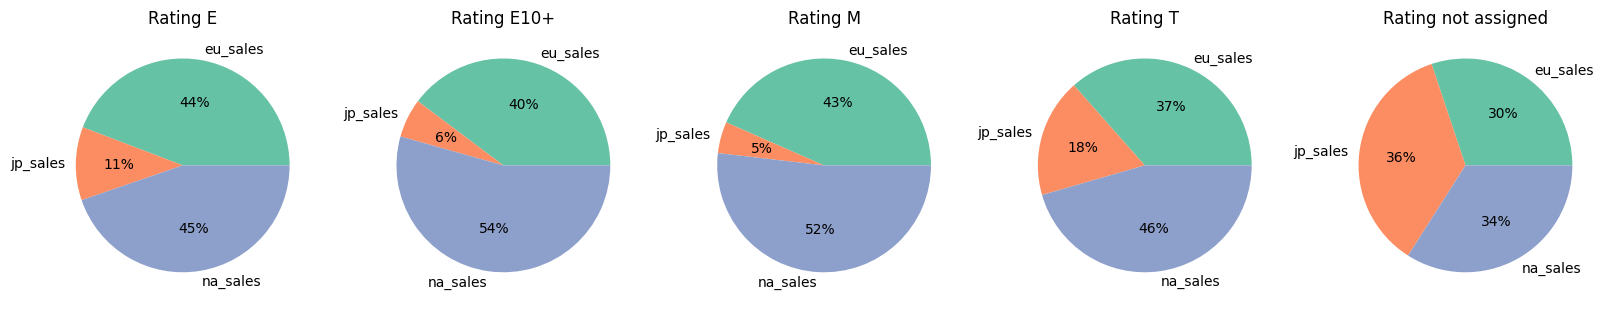

In [68]:
# swap rows and columns
rating_pivot = rating_pivot.transpose()

# create plot figure
fig, axes = plt.subplots(1, 5)
fig.set_size_inches(20, 10.5)

# create a pie chart for each rating
for i in range(5):
    rating_name = rating_pivot.columns[i]
    ax = axes[i]
    ax.pie(
        rating_pivot.iloc[:, i], labels=rating_pivot.iloc[:, 3].index, autopct="%.0f%%"
    )
    ax.set_title("Rating " + rating_name)

plt.show()

Additionally, we will study the sales ratio depending on the rating for each market. For comparison, we will take the average number of copies per game in each category (rating).

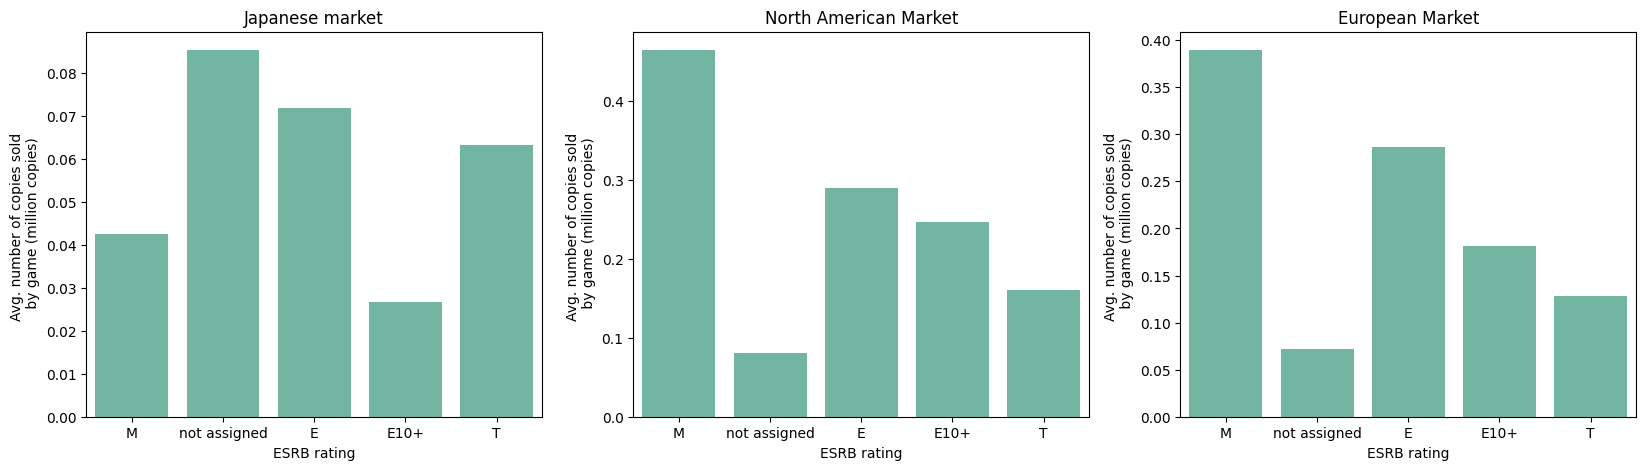

In [69]:
# create plot figure
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 5)

sns.barplot(ax=axes[0], data=actual_data, y="jp_sales", x="rating", ci=None)
axes[0].set_title("Japanese market")
axes[0].set_xlabel("ESRB rating")
axes[0].set_ylabel("Avg. number of copies sold \n by game (million copies)")

sns.barplot(ax=axes[1], data=actual_data, y="na_sales", x="rating", ci=None)
axes[1].set_title("North American Market")
axes[1].set_xlabel("ESRB rating")
axes[1].set_ylabel("Avg. number of copies sold \n by game (million copies)")

sns.barplot(ax=axes[2], data=actual_data, y="eu_sales", x="rating", ci=None)
axes[2].set_title("European Market")
axes[2].set_xlabel("ESRB rating")
axes[2].set_ylabel("Avg. number of copies sold \n by game (million copies)")

plt.show();

**Observations:**

* In Europe and North America, a similar situation is observed: games rated "Mature" (M) sell the best. Games rated "Teen" (T), on the contrary, occupy the last place in terms of sales per game on average.
This may be due to the popular genres on the market, as well as the fact that the decision to buy games for teenagers is made by parents, while games in the "mature" genre are bought by adults themselves.

* In Japan, most games on the market do not have an ESRB rating. These games were probably not released on the North American market. Among those games that have a rating, games rated "E" - "For Everyone" sell the best. Games rated "E10+" - "From 10 years and up" occupy the last place in sales. It can also be assumed that the smaller amount of game content with the "mature" category in Japan is due to the smaller share of games in the "shooter" genre. In general, the ESRB rating is not so relevant for the Japanese market. It is worth checking whether a similar rating system exists in Japan.

Thus, it can be assumed that the rating `T` for "Teen" may affect sales in North America and Europe.

### Interim conclusion

We studied how the popularity of platforms and genres depends on the market, and also determined the share of games by ESRB rating for each market.

Here is the buyer profile depending on the region:
* In Japan, consoles from Japanese companies (Nintendo and PlayStation), RPG games are popular, and the most common rating is “E”.
* The leading platform in Europe is the PS4 (which we identified as potentially profitable). Action and Shooter games are preferred here, and the most common rating is M.
* The most popular platform in North America is the X360 (also selected by us as potentially profitable). Action and Shooter games are also preferred here, and the most common rating is M.

## Hypothesis testing

### Hypothesis #1

*Average user ratings for Xbox One and PC platforms are the same*

**Let's formulate a hypothesis:**

We will compare two samples:

1 - user ratings for games on the `Xbox One` platform

2 - user ratings for games on the `PC` platform

**Null hypothesis** - the average value of user ratings for games on the `Xbox One` platform `=` the average value of user ratings for games on the `PC` platform

**Alternative hypothesis** - the average value of user ratings for games on the `Xbox One` platform `!=` the average value of user ratings for games on the `PC` platform

Thus, the alternative hypothesis is two-tailed.

We use the method for testing the hypothesis of the equality of the average of two populations based on the samples taken from them - scipy.stats.ttest_ind()

In [70]:
sample_1 = actual_data.query('platform == "XOne" & ~user_score.isna()')["user_score"]
sample_2 = actual_data.query('platform == "PC" & ~user_score.isna()')["user_score"]
alpha = 0.05  # set the significance level

# ttest for two samples
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print("p-value:", results.pvalue)

# check p-value
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("There is no reason to reject the null hypothesis")

p-value: 0.5489537965134912
There is no reason to reject the null hypothesis


Let's calculate the mean for the samples and compare it with the t-test results

In [71]:
print("Mean of the first sample: ", sample_1.mean())
print("Mean of the second sample: ", sample_2.mean())
print("Ratio of samples: ", sample_1.mean() / sample_2.mean())

Mean of the first sample:  6.521428571428572
Mean of the second sample:  6.4286407766990274
Ratio of samples:  1.014433501256729


The sample means differ, but not significantly.

**Conclusion**

The obtained p-value is significantly greater than the specified significance level, there is reason to assume that the average user ratings of the Xbox One and PC platforms are the same

### Hypothesis #2

*Average user ratings of Action and Sports genres are different.*

**Let's formulate a hypothesis:**

We will compare two samples:

1 - user ratings of Action games

2 - user ratings of Sports games

**Null hypothesis** - average user ratings for Action games `=` average user ratings for Sports games

**Alternative hypothesis** - average user ratings for Action games `!=` average user ratings for Sports

Thus, the alternative hypothesis is two-tailed.

We use the method for testing the hypothesis of equality of the average of two populations based on samples taken from them - scipy.stats.ttest_ind()

In [72]:
sample_1 = actual_data.query('genre == "Action" & ~user_score.isna()')["user_score"]
sample_2 = actual_data.query('genre == "Sports" & ~user_score.isna()')["user_score"]
alpha = 0.05  # set the significance level

# ttest for two samples
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print("p-value:", results.pvalue)

# check p-value
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("There is no reason to reject the null hypothesis")

p-value: 5.989458066467418e-20
Reject the null hypothesis


Let's calculate the mean for the samples and compare it with the t-test results

In [73]:
print("Mean of the first sample: ", sample_1.mean())
print("Mean of the second sample: ", sample_2.mean())
print("Ratio of samples: ", sample_1.mean() / sample_2.mean())

Mean of the first sample:  6.825047801147227
Mean of the second sample:  5.455670103092784
Ratio of samples:  1.251000825229178


The sample means do indeed differ greatly.

**Conclusion**

Based on the available data, at a significance level of 5%, there are grounds to reject the null hypothesis about the equality of the average values of user ratings (reviews) of the Action and Sports genres in favor of the alternative hypothesis.

### Interim conclusion

**Hypothesis 1** — Average user ratings of the Action and Sports genres are different.\
**Hypothesis test result:** There is reason to assume that the average user ratings of the Xbox One and PC platforms are the same

**Hypothesis 2** — Average user ratings of the Xbox One and PC platforms are the same\
**Hypothesis test result:** There is reason to assume that the average user ratings of the Action and Sports genres are different.

## Research results

**`Data preprocessing:`**

* replaced column types with appropriate ones, handled missing values, checked the dataset for axcact and partial duplicates 
* calculated total sales by region for each game and added the results to a new column `total_sales`

---
**`Exploratory analysis:`**

* The 2000s were the most productive years in terms of the number of games released, followed by 2008 and 2009. After a sharp decline in 2012, the number of games released remains at about the same level.
* The average active life of a gaming platform is about 10 years. Sales usually peak in the 4th to 6th year of the platform's existence. All platforms studied are currently experiencing a decline in sales of new games, and the PS2, DS, and PS have not released any new releases in recent years.
* For our study, we used data for the past five years (from 2012 to 2016).
* We studied the sales of gaming platforms for the current period and singled out the PS4 and XOne as potentially profitable.
* Over the past five years, on average, the greatest revenue from global sales was generated by games for the Xbox 360 platform. Each platform has its own hits that sell significantly better than other games on this platform.
* We found a weak correlation between critic scores and sales, and found that there was no clear correlation between user scores and sales. These relationships were tested for both the popular PS4 platform and data from five other profitable platforms.
* The most profitable genres were Shooter, Sports, and Platform, while the least profitable was Adventure.

---
**`User profile for each region`**

We have studied the dependence of platform and genre popularity on the market, and also specified the shares of games by ESRB rating for each market.

* In Japan, consoles from Japanese companies (Nintendo and PlayStation) and RPG games are popular, and the most common rating is "E".
* The leading platform in Europe is the PS4 (which we have identified as potentially profitable). Action and Shooter games are preferred here, and the most common rating is M.
* The most popular platform in North America is the X360 (which we have also selected as potentially profitable). Action and Shooter games are also preferred here, and the most common rating is M.

In general, there is a noticeable similarity between the North American and European markets.

---
**`Hypotheses testing and following conclusions:`**

* **1 Average user ratings for the Xbox One and PC platforms are the same** — There is reason to believe that the average user ratings for the Xbox One and PC platforms are the same

* **2 Average user ratings for the Action and Sports genres are different.** — There is reason to believe that the average user ratings for the Action and Sports genres are different.
---
**`Recommendations`**

So, a potentially successful product depends on the market where the advertising campaign is planned:

* In Europe and North America, you can choose Shooter and Action games for the PS4 platform in Europe and X360 in North America. Preference should be given to games with an M rating.

* Japan is characterized by consoles from Japanese companies (you can consider the increasingly popular PS4 or pay attention to the new Nintendo Switch platform as a potential prospect in Japan), as well as RPG games. In this market, you can ignore the ESRB rating, since most games on the market do not have one. Games with an "E" rating also sell well.

* Although the study showed no relationship between user ratings and sales and a weak relationship between critic ratings and sales, it is advisable to avoid games with below average ratings.